# Machine Learning Case Study On Credit Card Fraud Detection Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:\\ITVedanta\\Machine Learning\\Project ML\\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

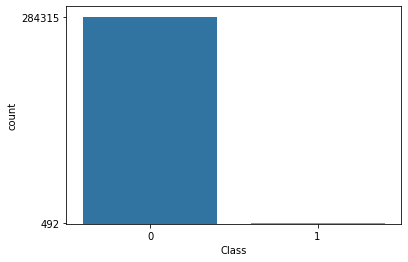

In [7]:
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

- **Observation:** 
    - Data is heavily imbalced here.
    - Class '0' has 284315 records and class'1' has only 492 records.
    - Here, class '0' is for No Fraud and class '1' is for Fraud records.
    - Data should be atleast 50-50 % distributed when we are predicting between yes and no.

In [8]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [10]:
#separate input and output variable:
X=df.drop("Class",axis=1) #input variable
Y=df["Class"] #Target variable

In [11]:
# spliting dataset 70% - 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
# Function to create model
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print(classification_report(Y_test1,Y_pred))
    print("Confusion Matrix :")
    #Confusion matrix
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
#create object of LogisticRegression class

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [15]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [16]:
lr.score(X_test,Y_test)

0.9989934810341398

In [17]:
Y_prediction=lr.predict(X_test)

In [18]:
# Basemodel Logistic regression
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.62      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443



- **Observation:** 
    - In above report '0' has given perfect score but '1' has given bad results as it has lesser samples or imbalanced samples as compare to '0'.
    - '0' has - 100% recall score and '1' has 62% recall score.
    - This dataset has intention to detect fraud so we need to focus on '1' score.
    - Lets balance the dataset first.

In [19]:
# OVER SAMPLER:
ros = RandomOverSampler() 

In [20]:
# before apply randomoversampler
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [21]:
# apply randomundersampling for balance
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [22]:
# after apply randomoversampler
pd.Series(Y_train1).value_counts()

1    199007
0    199007
Name: Class, dtype: int64

In [23]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [24]:
#before apply randomoversampler ,check Y_test
pd.Series(Y_test).value_counts() #check if not balance

0    85308
1      135
Name: Class, dtype: int64

In [25]:
#apply randomoversampling for balance
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [26]:
#after apply randomoversampler
pd.Series(Y_test1).value_counts()

1    85308
0    85308
Name: Class, dtype: int64

In [27]:
# Logistic regression Oversampling
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     85308
           1       0.97      0.87      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

Confusion Matrix :
[[82826  2482]
 [11310 73998]]


- **OBSERVATION AFTER OVERSAMPLING in LogisticRegression**
    - This score report is better than report before sampling.
    - Class '0' - 97%  and  class '1' - 87%

In [28]:
#DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

In [29]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [30]:
# Decision Tree Classifier with Over sampling
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     85308
           1       1.00      0.69      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.84    170616
weighted avg       0.88      0.85      0.84    170616

Confusion Matrix :
[[85276    32]
 [26267 59041]]


- **OBSERVATION AFTER OVERSAMPLING in Decision Tree Classifier**
    - This score report is better than report before sampling, Logistic Regression and over sampling technique also.
    - Class '0' - 87%  and  class '1' - 92% 
    - Lets check if our model has overfitting.

In [31]:
# Checking training score
training_score=dt.score(X_train1,Y_train1)
print("Training Score : ",training_score)

Training Score :  1.0


In [32]:
# Checking testing score
testing_score=dt.score(X_test1,Y_test1)
print("Testing Score : ",testing_score)

Testing Score :  0.845858536127913


- As we can see training score > testing score means under sampled DTC model has overfitting.
- To remove overfitting, lets apply pruning techniques.
### 1. max_depth (Pruning Technique)

In [33]:
# create object of DecisionTreeClassifier class and passing the parameter
#max_depth
dt1=DecisionTreeClassifier(max_depth=8)

In [34]:
# Decision Tree Classifier (max_depth pruning technique) with oversampling 
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix :
[[84390   918]
 [14995 70313]]


- Using max_depth pruning technique, we are getting less recall score for 'fraudulent records', than DTC under sampled model. 
- Now check another pruning technique.
### 2. min_samples_leaf: 

In [35]:
# create object of DecisionTreeClassifier for min_sample_leaf class
dt2=DecisionTreeClassifier(min_samples_leaf=45)

In [36]:
# Decision Tree Classifier (min_samples_leaf pruning technique) with oversampling 
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix :
[[85094   214]
 [15121 70187]]


- Using min_sample_leaf pruning technique also, we are getting less recall score for 'fraudulent records', than DTC under sampled model.
- So, we are concluding that, the model was not overfit.
- Lets use seom Feature selection methods and check if we can improve scores.

## Feature Selection:
### 1. Wrapper- A) Forward method:

In [37]:
columns=[] #columns is the user defined list object
for col in X:
    #print(col)
    columns.append(col)
    #print(columns)
    X_new=df[columns] #new input
    #call train_test_split()
    X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3,random_state=1)
    #create object of LinearRegression class
    lr=LogisticRegression()
    #train the model
    lr.fit(X_train,Y_train)
    #find score
    score=lr.score(X_test,Y_test)
    print("Column : ",col," Score : ",score)

Column :  Time  Score :  0.9984199992977775
Column :  V1  Score :  0.9982795547909132
Column :  V2  Score :  0.9984551104244935
Column :  V3  Score :  0.9983614807532507
Column :  V4  Score :  0.9987828142738434
Column :  V5  Score :  0.9988062216916541
Column :  V6  Score :  0.9986189623491685
Column :  V7  Score :  0.9986540734758845
Column :  V8  Score :  0.9985721475135471
Column :  V9  Score :  0.997940147232658
Column :  V10  Score :  0.9974251840408226
Column :  V11  Score :  0.9975539248387814
Column :  V12  Score :  0.9980571843217115
Column :  V13  Score :  0.9983263696265346
Column :  V14  Score :  0.9988647402361809
Column :  V15  Score :  0.9988881476539916
Column :  V16  Score :  0.9989583699074237
Column :  V17  Score :  0.998934962489613
Column :  V18  Score :  0.9990285921608558
Column :  V19  Score :  0.9982561473731025
Column :  V20  Score :  0.9988647402361809
Column :  V21  Score :  0.9983263696265346
Column :  V22  Score :  0.9990637032875719
Column :  V23  Score 

- **Observation: for Forward Wrapping Method**
    - Cannot conclude which features are important as there is No significant change has found for any feature.
    - Here we are getting score 99% for entire input features.


   
### 2.Feature Selection by PCA:

In [38]:
from sklearn.decomposition import PCA

In [39]:
#Create object of PCA
pc=PCA(n_components=18,random_state=1)#n_components : how many principal components
X_train_pc=pc.fit_transform(X_train1,Y_train1)

In [40]:
X_test_pc=pc.transform(X_test1)

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(X_train_pc,Y_train1)

LogisticRegression()

In [43]:
lr.score(X_test_pc,Y_test1)

0.885807896094153

- **Observation of PCA after balancing and reforming dataset:**


    - We got highest score at n_estimator value 18, which is 0.9.
    - But if we see carefully there is not a significant change in scores after 13 to 29.
    - So for now keeping all features as input records.
    
    
- **Till now we have the highest score of module of DTC(under sampling)**

## Ensembling technique 
### 1. Naive Aggregation
##### a) Hard Voting

In [44]:
# First take logistic regreesion 
# create object of Logistic Regression class 
lr=LogisticRegression()

# Second take DecisionTreeClassifier : gini index
# Create the object of DecisionTreeClassifier  class
dt1=DecisionTreeClassifier() #bydefault method gini index

# Third take DecisionTreeClassifier : entropy method
# Create the object of DecisionTreeClassifier  class
dtE=DecisionTreeClassifier(criterion="entropy") 

In [45]:
#Begin with simple first
#create a model list 
model_list=[("Logistic",lr),("Decision_tree_gini",dt1),
            ("Decision_tree_entropy",dtE)]
#("model name",object of those model)

In [46]:
#Then we need Naive aggregation
#we importing class
from sklearn.ensemble import VotingClassifier

In [47]:
#create the object of VotingClassifier class
vc=VotingClassifier(estimators=model_list) 
#bydefault use hardvoting 

In [48]:
#Naive Hard voting
#call create_model()
model=create_model(vc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Confusion Matrix :
[[85274    34]
 [18132 67176]]


##### b) Soft Voting

In [49]:
#create the object of VotingClassifier class
vc2=VotingClassifier(estimators=model_list,voting="soft") 
# as voting='hard' is by default

In [50]:
# Naive soft voting
#call create_model()
model=create_model(vc2)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Confusion Matrix :
[[85280    28]
 [18760 66548]]


### 2. Bootstrapping:
#### a) Bagging:

In [51]:
from sklearn.ensemble import BaggingClassifier

In [52]:
#Create object of BaggingClassifier class
bc= BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=100,
                      random_state=1)

In [53]:
# Bootstrapping- Bagging - Logistic regression
#call function
model=create_model(bc)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     85308
           1       0.96      0.88      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

Confusion Matrix :
[[82018  3290]
 [10659 74649]]


In [54]:
#Create object of BaggingClassifier class
bc2= BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=520,
                      random_state=1)

In [55]:
# Bootstrapping- Bagging - DTC
#call function
model=create_model(bc2)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

Confusion Matrix :
[[84076  1232]
 [13162 72146]]


#### b) Pasting:

In [56]:
#Create object of BaggingClassifier class
bc3= BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=650,
                       random_state=1,bootstrap=False) 
# bootstrap=False: means pasting 
# bydefault bootstrap=True means bagging

In [57]:
# Bootstrapping- Pasting - Logistic regression

#call function
model=create_model(bc3)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85308
           1       0.97      0.87      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix :
[[82855  2453]
 [10713 74595]]


In [58]:
#Create object of BaggingClassifier class
bc4= BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=200,
                      random_state=1,bootstrap=False)

In [59]:
# Bootstrapping- Pasting - DTC

#call function
model=create_model(bc4)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85308
           1       0.97      0.88      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix :
[[83030  2278]
 [ 9981 75327]]


## Random Forest Tree:  


In [60]:
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier

In [61]:
#Create the object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=5,max_features=5,random_state=1)
#max_features not more than 10

In [62]:
#call function
model=create_model(rfc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.88    170616
weighted avg       0.91      0.89      0.88    170616

Confusion Matrix :
[[85299     9]
 [19498 65810]]


## 3. Stacking classifer: 

In [63]:
#call StackingClassifier
from mlxtend.classifier import StackingClassifier

In [64]:
#Create object of Logistic Regression ,Decision Tree Entropy and Decision Tree
#Gini
lr=LogisticRegression()
dt1=DecisionTreeClassifier() #bydefault gini index
dt2=DecisionTreeClassifier(criterion="entropy") 

In [65]:
#create a model list
model_list=[lr,dt1,dt2]

In [66]:
# use meta classifier , 
# select algorithm for meta classifier : LogisticRegression()
meta=LogisticRegression() 

In [67]:
#Create the objec tof StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [68]:
# StackingClassifier
#call function
model=create_model(sc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Confusion Matrix :
[[85277    31]
 [18135 67173]]


## 4. Boosting : 
### 1. ADA Boost : Adapter boosting 

In [69]:
from sklearn.ensemble import AdaBoostClassifier 

In [70]:
ada=AdaBoostClassifier(n_estimators=35) 
# n_estimators can be <=100

In [71]:
#call function
model=create_model(ada)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     85308
           1       0.98      0.87      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix :
[[83713  1595]
 [11316 73992]]


### 2. Gradient Boosting:


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
gbc=GradientBoostingClassifier(n_estimators=30) 

In [74]:
model=create_model(gbc)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

Confusion Matrix :
[[84467   841]
 [11357 73951]]


## 3. Extreame Gradient Boosting  : 


In [75]:
from xgboost import XGBClassifier

In [76]:
xg=XGBClassifier(n_estimators=40, reg_alpha=1) 

In [77]:
import warnings
warnings.filterwarnings('ignore')
#call function
model=create_model(xg)

[18:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix :
[[85284    24]
 [16262 69046]]


# SVM: Support Vector Machine
### 1. Linear Separable data means Linear Kernal

In [78]:
from sklearn.svm import LinearSVC

In [79]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1)  #by default hard margin

In [80]:
#call function (for train ,test and print the report)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     85308
           1       0.99      0.76      0.86     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

Confusion Matrix :
[[84540   768]
 [20665 64643]]


In [81]:
svc=LinearSVC(random_state=1,C=0.05)


In [82]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     85308
           1       0.97      0.81      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.90      0.89      0.89    170616
weighted avg       0.90      0.89      0.89    170616

Confusion Matrix :
[[82858  2450]
 [16230 69078]]


# Conclusion:
